In [4]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import csv

In [129]:
cur_path = '/Users/sonalichaudhari/Desktop/ADS_Project/Data'
df = pd.read_csv(open(cur_path+'/dataweatherclean.csv','rU'), encoding='utf-8')

In [130]:
df.dtypes

FlightDate            object
FlightNum              int64
Year                   int64
Day                    int64
Month                  int64
Week                   int64
Origin                object
Dest                  object
UniqueCarrier         object
Cancelled              int64
ArrTime                int64
ArrTimeBlk            object
DepTime                int64
DepTimeBlk            object
CRSArrTime             int64
CRSDepTime             int64
DepDel15               int64
ArrDel15               int64
CRSElapsedTime         int64
ActualElapsedTime      int64
WheelsOn               int64
WheelsOff              int64
LateAircraftDelay    float64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
ArrDelayMinutes        int64
DepDelayMinutes        int64
OriginCityName        object
DestCityName          object
Distance               int64
Flight_Status          int64
OriginVisibility     float64
OriginWind    

In [21]:
df.shape

(8058349, 36)

In [114]:
# from datetime import datetime as dt
# date_str='14:38:00'
# date_obj = dt.strptime(date_str, '%H:%M:%S %p')
# dt.strftime(date_obj, '%I:%M:%S %p')

In [131]:
df['CRSDep_hour'] = df['CRSDepTime'].apply(lambda x: str(x)[:-2])
df['CRSDep_min'] = df['CRSDepTime'].apply(lambda x: str(x)[1:3] if len(str(x))==3 else  str(x)[2:4])
df = df.replace('', 0)
df['CRSArr_hour'] = df['CRSArrTime'].apply(lambda x: str(x)[:-2])
df['CRSArr_min'] = df['CRSArrTime'].apply(lambda x: str(x)[1:3] if len(str(x))==3 else  str(x)[2:4])
df = df.replace('', 0)

In [132]:
df['Scheduled_Dep_T'] = df.CRSDep_hour.astype(str).str.cat(df.CRSDep_min.astype(str), sep=':')
df['Scheduled_Arr_T'] = df.CRSArr_hour.astype(str).str.cat(df.CRSArr_min.astype(str), sep=':')

In [133]:
df[['CRSDep_hour','CRSDep_min','CRSArr_hour','CRSArr_min']] = df[['CRSDep_hour','CRSDep_min','CRSArr_hour','CRSArr_min']].astype(int)

In [134]:
df.dtypes

FlightDate            object
FlightNum              int64
Year                   int64
Day                    int64
Month                  int64
Week                   int64
Origin                object
Dest                  object
UniqueCarrier         object
Cancelled              int64
ArrTime                int64
ArrTimeBlk            object
DepTime                int64
DepTimeBlk            object
CRSArrTime             int64
CRSDepTime             int64
DepDel15               int64
ArrDel15               int64
CRSElapsedTime         int64
ActualElapsedTime      int64
WheelsOn               int64
WheelsOff              int64
LateAircraftDelay    float64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
ArrDelayMinutes        int64
DepDelayMinutes        int64
OriginCityName        object
DestCityName          object
Distance               int64
Flight_Status          int64
OriginVisibility     float64
OriginWind    

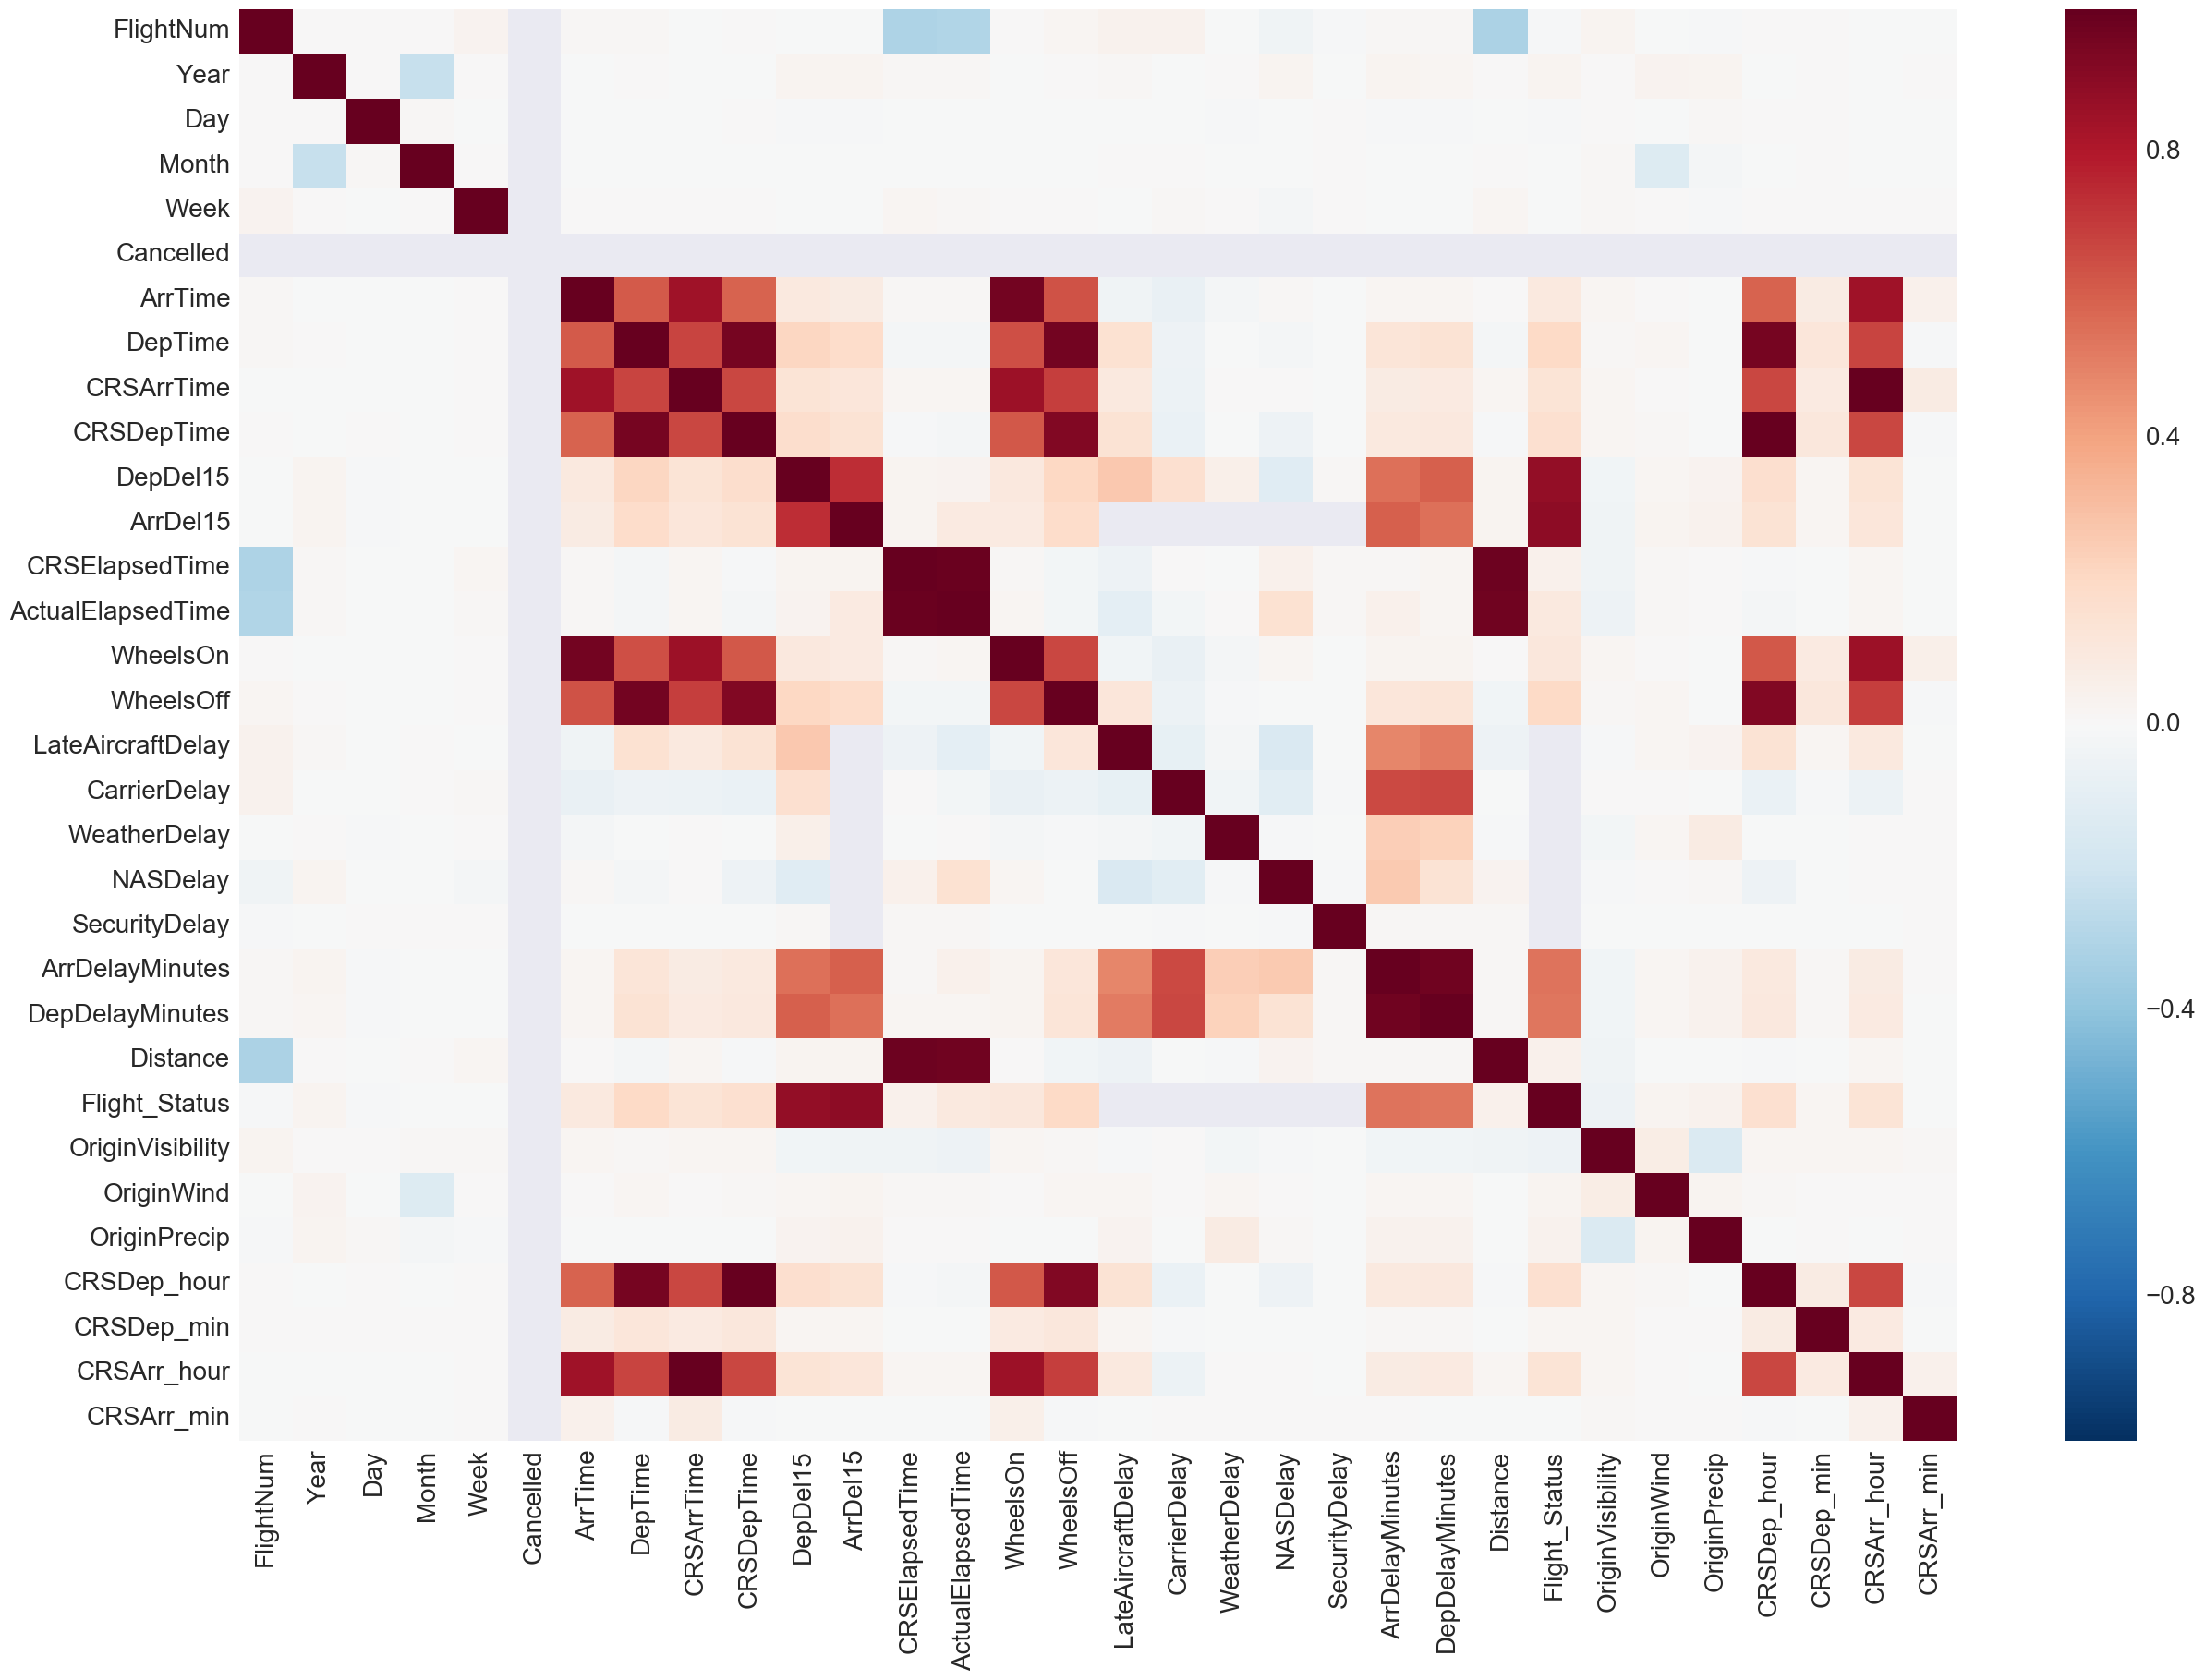

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
color = sns.color_palette()
plt.figure(figsize = (30,20))
sns.set(font_scale = 2)
sns.heatmap(data=df.corr())
plt.show()
plt.gcf().clear()

In [125]:
S =df[['OriginCityName','DestCityName','Origin','Dest','UniqueCarrier']]
P = df['Flight_Status']

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

S['carrier'] = label_encoder.fit_transform(S['UniqueCarrier'])
S['origin'] = label_encoder.fit_transform(S['Origin'])
S['dest'] = label_encoder.fit_transform(S['Dest'])
S['ori_city'] = label_encoder.fit_transform(S['OriginCityName'])
S['dest_city'] = label_encoder.fit_transform(S['DestCityName'])


S =  S._get_numeric_data()


import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Build a classification task using 3 informative features
S, P = make_classification(n_samples=1000,
                           n_features=5,
                           n_informative=3,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(S, P)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f],importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(figsize=(18, 10))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

Feature ranking:
1. feature 1 (0.354203)
2. feature 2 (0.280458)
3. feature 0 (0.242652)
4. feature 3 (0.061622)
5. feature 4 (0.061066)


IndexError: index 5 is out of bounds for axis 0 with size 5

In [93]:
cols = df.columns.tolist()
cols.remove('Flight_Status')
cols.remove('CRSArrTime')
cols.remove('CRSDepTime')
cols
len(cols)

39

In [103]:
X = df[cols]
y = df['Flight_Status']

In [104]:
X.columns

Index(['FlightDate', 'FlightNum', 'Year', 'Day', 'Month', 'Week', 'Origin',
       'Dest', 'UniqueCarrier', 'Cancelled', 'ArrTime', 'ArrTimeBlk',
       'DepTime', 'DepTimeBlk', 'DepDel15', 'ArrDel15', 'CRSElapsedTime',
       'ActualElapsedTime', 'WheelsOn', 'WheelsOff', 'LateAircraftDelay',
       'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'ArrDelayMinutes', 'DepDelayMinutes', 'OriginCityName', 'DestCityName',
       'Distance', 'OriginVisibility', 'OriginWind', 'OriginPrecip',
       'CRSDep_hour', 'CRSDep_min', 'CRSArr_hour', 'CRSArr_min',
       'Scheduled_Dep_T', 'Scheduled_Arr_T'],
      dtype='object')

In [105]:
len(X.columns)

39

In [106]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

X['carrier'] = label_encoder.fit_transform(X['UniqueCarrier'])
X['origin'] = label_encoder.fit_transform(X['Origin'])
X['dest'] = label_encoder.fit_transform(X['Dest'])
X['ori_city'] = label_encoder.fit_transform(X['OriginCityName'])
X['dest_city'] = label_encoder.fit_transform(X['DestCityName'])
X['arrtimeblk'] = label_encoder.fit_transform(X['ArrTimeBlk'])
X['deptimeblk'] = label_encoder.fit_transform(X['DepTimeBlk'])

X = X._get_numeric_data()

In [109]:
X.columns.tolist()

['FlightNum',
 'Year',
 'Day',
 'Month',
 'Week',
 'Cancelled',
 'ArrTime',
 'DepTime',
 'DepDel15',
 'ArrDel15',
 'CRSElapsedTime',
 'ActualElapsedTime',
 'WheelsOn',
 'WheelsOff',
 'LateAircraftDelay',
 'CarrierDelay',
 'WeatherDelay',
 'NASDelay',
 'SecurityDelay',
 'ArrDelayMinutes',
 'DepDelayMinutes',
 'Distance',
 'OriginVisibility',
 'OriginWind',
 'OriginPrecip',
 'carrier',
 'origin',
 'dest',
 'ori_city',
 'dest_city',
 'arrtimeblk',
 'deptimeblk',
 'oricity',
 'depcity']

In [110]:
c=0
for i in X.columns.tolist():
    print(c,'',i)
    c=c+1

0  FlightNum
1  Year
2  Day
3  Month
4  Week
5  Cancelled
6  ArrTime
7  DepTime
8  DepDel15
9  ArrDel15
10  CRSElapsedTime
11  ActualElapsedTime
12  WheelsOn
13  WheelsOff
14  LateAircraftDelay
15  CarrierDelay
16  WeatherDelay
17  NASDelay
18  SecurityDelay
19  ArrDelayMinutes
20  DepDelayMinutes
21  Distance
22  OriginVisibility
23  OriginWind
24  OriginPrecip
25  carrier
26  origin
27  dest
28  ori_city
29  dest_city
30  arrtimeblk
31  deptimeblk
32  oricity
33  depcity


Feature ranking:
1. feature 1 (0.182671)
2. feature 2 (0.078540)
3. feature 0 (0.066555)
4. feature 31 (0.023311)
5. feature 20 (0.022994)
6. feature 17 (0.022959)
7. feature 23 (0.022843)
8. feature 6 (0.022510)
9. feature 28 (0.022444)
10. feature 32 (0.022339)
11. feature 9 (0.022208)
12. feature 18 (0.022132)
13. feature 22 (0.022075)
14. feature 30 (0.021973)
15. feature 16 (0.021972)
16. feature 12 (0.021865)
17. feature 14 (0.021816)
18. feature 5 (0.021768)
19. feature 13 (0.021744)
20. feature 19 (0.021624)
21. feature 27 (0.021585)
22. feature 11 (0.021550)
23. feature 25 (0.021468)
24. feature 33 (0.021451)
25. feature 15 (0.021321)
26. feature 3 (0.021074)
27. feature 10 (0.021048)
28. feature 24 (0.020783)
29. feature 26 (0.020776)
30. feature 4 (0.020761)
31. feature 7 (0.020734)
32. feature 21 (0.020587)
33. feature 8 (0.020564)
34. feature 29 (0.019956)


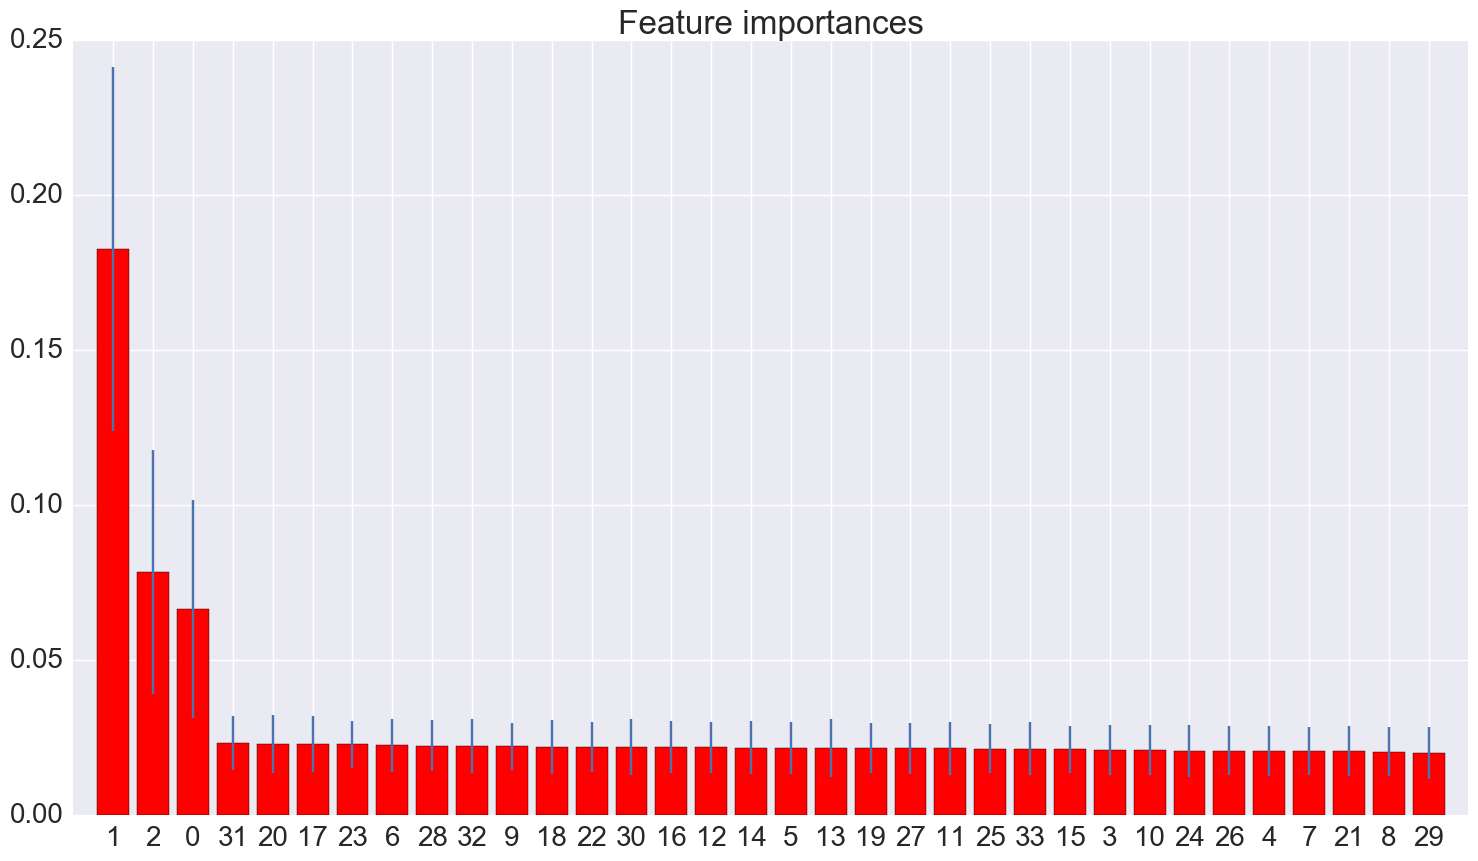

In [113]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Build a classification task using 3 informative features
X, y = make_classification(n_samples=1000,
                           n_features=34,
                           n_informative=3,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f],importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(figsize=(18, 10))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

# CLASSIFICATION

In [172]:
s = ['Year', 'Day', 'Month', 'Week', 'Origin','Dest', 'UniqueCarrier','CRSElapsedTime', 'WheelsOn', 'WheelsOff',
       'Distance', 'OriginWind', 'OriginPrecip','CRSDep_hour','CRSArr_hour']

In [173]:
len(s)

15

In [174]:
X= df[s]
y = df['Flight_Status']

In [175]:
X.isnull().sum()

Year              0
Day               0
Month             0
Week              0
Origin            0
Dest              0
UniqueCarrier     0
CRSElapsedTime    0
WheelsOn          0
WheelsOff         0
Distance          0
OriginWind        0
OriginPrecip      0
CRSDep_hour       0
CRSArr_hour       0
dtype: int64

In [176]:
from sklearn import preprocessing, cross_validation

y = np.ravel(y)
# Splitting the data
X_train, X_test, y_train, y_test =  cross_validation.train_test_split(X, y,test_size=0.30,random_state=0)

In [177]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
# Converting the categorical data to numeric 

X_train['carrier'] = label_encoder.fit_transform(X_train['UniqueCarrier'])
X_train['origin'] = label_encoder.fit_transform(X_train['Origin'])
X_train['dest'] = label_encoder.fit_transform(X_train['Dest'])
# X_train['ori_city'] = label_encoder.fit_transform(X_train['OriginCityName'])
# X_train['dest_city'] = label_encoder.fit_transform(X_train['DestCityName'])

X_test['carrier'] = label_encoder.fit_transform(X_test['UniqueCarrier'])
X_test['origin'] = label_encoder.fit_transform(X_test['Origin'])
X_test['dest'] = label_encoder.fit_transform(X_test['Dest'])
# X_test['ori_city'] = label_encoder.fit_transform(X_test['OriginCityName'])
# X_test['dest_city'] = label_encoder.fit_transform(X_test['DestCityName'])

# Getting only the numerical columns

X_train = X_train._get_numeric_data()
X_test = X_test._get_numeric_data()

# NEURAL

In [164]:
from sklearn.neural_network import MLPClassifier

nn3 = MLPClassifier(hidden_layer_sizes=(10,5,2),max_iter=30,verbose=False)
nn3= nn3.fit(X_train, y_train)

accuracy = nn3.score(X_train, y_train)
print('Accuracy: ',accuracy)

# Run the model on the test set
y_pred = nn3.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy:  0.900583139686
[[1801327   78682]
 [ 162075  375421]]


In [165]:
from sklearn.neural_network import MLPClassifier

nn4 = MLPClassifier(hidden_layer_sizes=(10,5,2),max_iter=5,verbose=False)
nn4= nn4.fit(X_train, y_train)

accuracy = nn4.score(X_train, y_train)
print('Accuracy: ',accuracy)

# Run the model on the test set
y_pred = nn4.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy:  0.778367386157
[[1880009       0]
 [ 537496       0]]


In [167]:
from sklearn.neural_network import MLPClassifier

nn5 = MLPClassifier(hidden_layer_sizes=(15,10,5),max_iter=20,verbose=False, learning_rate='adaptive')
nn5= nn5.fit(X_train, y_train)

accuracy = nn5.score(X_train, y_train)
print('Accuracy: ',accuracy)

# Run the model on the test set
y_pred = nn5.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print(cm)

Accuracy:  0.905942266796
[[1846131   33878]
 [ 193970  343526]]


In [170]:
from sklearn.neural_network import MLPClassifier

nn6 = MLPClassifier(hidden_layer_sizes=(30,15,5),max_iter=20,verbose=False, learning_rate='adaptive')
nn6= nn6.fit(X_train, y_train)

accuracy = nn6.score(X_train, y_train)
print('Accuracy: ',accuracy)

# Run the model on the test set
y_pred = nn6.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print(cm)

Accuracy:  0.89090604172
[[1869126   10883]
 [ 253149  284347]]


In [ ]:
## CIty Dest origin

In [179]:
from sklearn.neural_network import MLPClassifier

nn7 = MLPClassifier(hidden_layer_sizes=(15,10,5),max_iter=5,verbose=False, learning_rate='adaptive')
nn7= nn7.fit(X_train, y_train)

accuracy = nn7.score(X_train, y_train)
print('Accuracy: ',accuracy)

# Run the model on the test set
y_pred = nn7.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print(cm)

Accuracy:  0.905408304147
[[1842518   37491]
 [ 191314  346182]]


In [ ]:
# With reomved dest city origin city elapsed actual

Accuracy:  0.88167923098
[[1740534  139475]
 [ 146440  391056]]


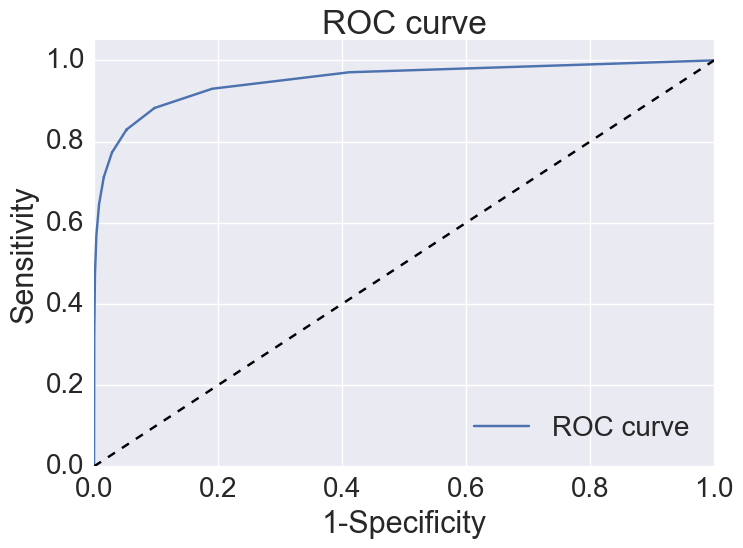

In [184]:
from sklearn.neural_network import MLPClassifier

nn8 = MLPClassifier(hidden_layer_sizes=(15,10,5),max_iter=5,verbose=False, learning_rate='adaptive')
nn8= nn8.fit(X_train, y_train)

accuracy = nn8.score(X_train, y_train)
print('Accuracy: ',accuracy)

# Run the model on the test set
y_pred = nn8.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

preds = rtf1.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, preds)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
### with accELapsed time:

In [153]:
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(hidden_layer_sizes=(15,10,5),max_iter=20,verbose=False)
nn= nn.fit(X_train, y_train)

accuracy = nn.score(X_train, y_train)
print('Accuracy: ',accuracy)

# Run the model on the test set
y_pred = nn.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy:  0.915421699306
[[1792079   87930]
 [ 116870  420626]]
MAE_train: 0.084578300694
MAE_test: 0.0847154400922
RMS_train: 0.084578300694
RMS_test: 0.0847154400922


In [154]:
from sklearn.neural_network import MLPClassifier

nn1 = MLPClassifier(hidden_layer_sizes=(15,10,5),max_iter=5,verbose=False)
nn1= nn1.fit(X_train, y_train)

accuracy = nn1.score(X_train, y_train)
print('Accuracy: ',accuracy)

# Run the model on the test set
y_pred = nn1.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy:  0.906789125883
[[1760412  119597]
 [ 106624  430872]]


In [155]:
from sklearn.neural_network import MLPClassifier

nn2 = MLPClassifier(hidden_layer_sizes=(10,5,2),max_iter=30,verbose=False)
nn2= nn2.fit(X_train, y_train)

accuracy = nn2.score(X_train, y_train)
print('Accuracy: ',accuracy)

# Run the model on the test set
y_pred = nn2.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy:  0.916501502257
[[1849942   30067]
 [ 171888  365608]]


In [185]:
#
s = ['Year', 'Day', 'Month', 'Week', 'Origin','Dest', 'UniqueCarrier','CRSElapsedTime', 'WheelsOn', 'WheelsOff', 'OriginWind', 'OriginPrecip','CRSDep_hour','CRSArr_hour']

X= df[s]
y = df['Flight_Status']

from sklearn import preprocessing, cross_validation

y = np.ravel(y)
# Splitting the data
X_train, X_test, y_train, y_test =  cross_validation.train_test_split(X, y,test_size=0.30,random_state=0)

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
# Converting the categorical data to numeric 

X_train['carrier'] = label_encoder.fit_transform(X_train['UniqueCarrier'])
X_train['origin'] = label_encoder.fit_transform(X_train['Origin'])
X_train['dest'] = label_encoder.fit_transform(X_train['Dest'])
# X_train['ori_city'] = label_encoder.fit_transform(X_train['OriginCityName'])
# X_train['dest_city'] = label_encoder.fit_transform(X_train['DestCityName'])

X_test['carrier'] = label_encoder.fit_transform(X_test['UniqueCarrier'])
X_test['origin'] = label_encoder.fit_transform(X_test['Origin'])
X_test['dest'] = label_encoder.fit_transform(X_test['Dest'])
# X_test['ori_city'] = label_encoder.fit_transform(X_test['OriginCityName'])
# X_test['dest_city'] = label_encoder.fit_transform(X_test['DestCityName'])

# Getting only the numerical columns

X_train = X_train._get_numeric_data()
X_test = X_test._get_numeric_data()

In [186]:
from sklearn.neural_network import MLPClassifier

nn9 = MLPClassifier(hidden_layer_sizes=(10,5,2),max_iter=30,verbose=False)
nn9= nn9.fit(X_train, y_train)

accuracy = nn9.score(X_train, y_train)
print('Accuracy: ',accuracy)

# Run the model on the test set
y_pred = nn9.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy:  0.872229049412
[[1876232    3777]
 [ 305548  231948]]


[[1876232    3777]
 [ 305548  231948]]


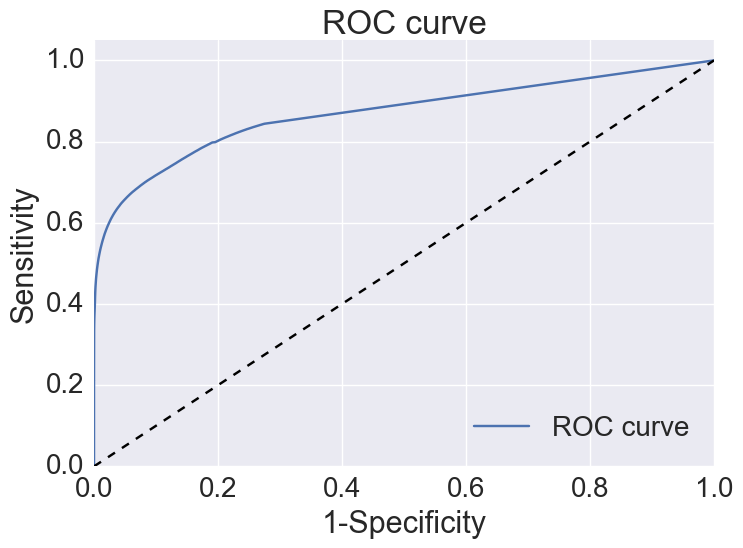

In [189]:
# Run the model on the test set
y_pred = nn9.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

preds = nn9.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, preds)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

Accuracy:  0.902773592037
[[1862826   17183]
 [ 218097  319399]]


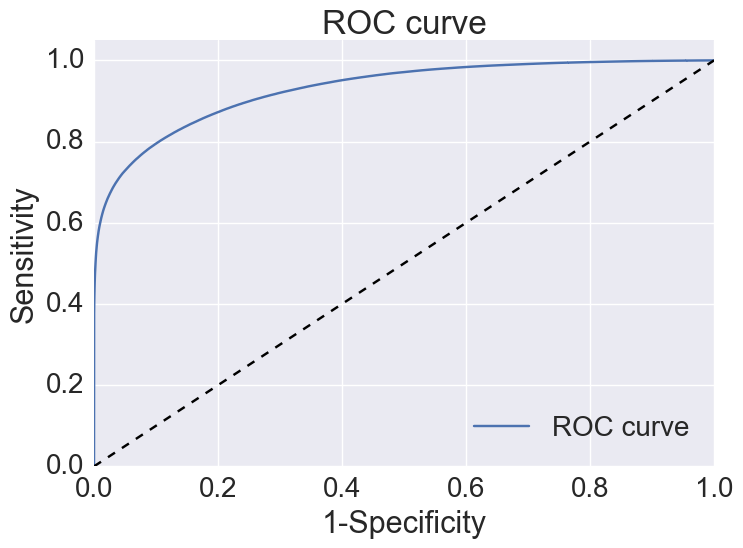

In [190]:
from sklearn.neural_network import MLPClassifier

nn10 = MLPClassifier(hidden_layer_sizes=(100,70,50,25,10,5),max_iter=30,verbose=False)
nn10= nn10.fit(X_train, y_train)

accuracy = nn10.score(X_train, y_train)
print('Accuracy: ',accuracy)

# Run the model on the test set
y_pred = nn10.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

preds = nn10.predict_proba(X_test)[:,1]

fpr, tpr, _ = roc_curve(y_test, preds)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

# RANDOM FOREST

In [168]:
# Creating the model
from sklearn.ensemble import RandomForestClassifier

model1 = RandomForestClassifier(max_depth =5,random_state=0)
model1 = model1.fit(X_train, y_train)

accuracy = model1.score(X_train, y_train)
print('Accuracy: ',accuracy)

# Run the model on the test set
y_pred = model1.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy:  0.796763037588
[[1879119     890]
 [ 491772   45724]]


In [171]:
# Creating the model
from sklearn.ensemble import RandomForestClassifier

rtf = RandomForestClassifier(max_depth =25,random_state=0)
rtf = rtf.fit(X_train, y_train)

accuracy = rtf.score(X_train, y_train)
print('Accuracy: ',accuracy)

# Run the model on the test set
y_pred = rtf.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy:  0.959037867383
[[1851227   28782]
 [ 151044  386452]]


In [180]:
## City dest origin removed

Accuracy:  0.993496008753
[[1850572   29437]
 [ 154683  382813]]


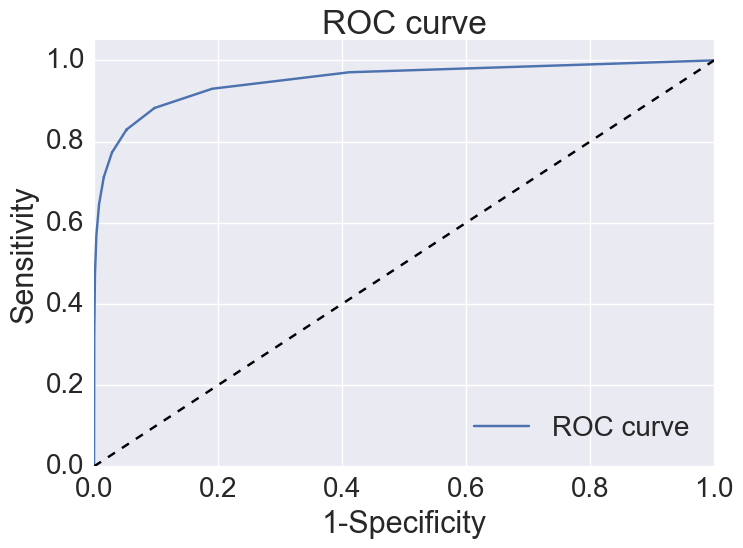

In [183]:
# # Creating the model
# from sklearn.ensemble import RandomForestClassifier

# rtf1 = RandomForestClassifier(max_depth =50,random_state=0)
# rtf1 = rtf1.fit(X_train, y_train)

#accuracy = rtf1.score(X_train, y_train)
print('Accuracy: ',accuracy)

# Run the model on the test set
y_pred = rtf1.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

preds = rtf1.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, preds)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [187]:
##s = ['Year', 'Day', 'Month', 'Week', 'Origin','Dest', 'UniqueCarrier','CRSElapsedTime', 'WheelsOn', 'WheelsOff', 'OriginWind', 'OriginPrecip','CRSDep_hour','CRSArr_hour']

Accuracy:  0.993229913821
[[1849984   30025]
 [ 157228  380268]]


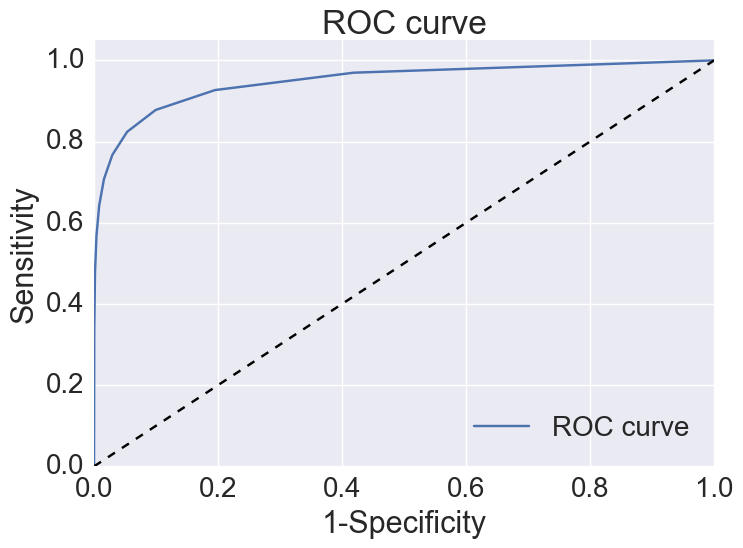

In [191]:
# Creating the model
from sklearn.ensemble import RandomForestClassifier

rtf1 = RandomForestClassifier(max_depth =50,random_state=0)
rtf1 = rtf1.fit(X_train, y_train)

accuracy = rtf1.score(X_train, y_train)
print('Accuracy: ',accuracy)

# Run the model on the test set
y_pred = rtf1.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

preds = rtf1.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, preds)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()